In [ ]:
from sklearn.datasets import fetch_california_housing

data =fetch_california_housing(as_frame=True)

In [ ]:
df=data.frame

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#피어슨 상관계수

pearson = df.corr(method='pearson')

In [ ]:
#스피어만 상관계수
spearman = df.corr(method='spearman')

In [ ]:
pearson, spearman

(               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
 MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
 HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
 AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
 AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
 Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
 AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
 Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
 Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
 MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   
 
              Latitude  Longitude  MedHouseVal  
 MedInc      -0.079809  -0.015176     0.688075  
 HouseAge     0.011173  -0.108197     0.105623  
 AveRooms     0.106389  -0.027540     0.151948  
 AveBedrms  

In [ ]:
#MedHouseVal과 다른 변수 간 피어슨 상관계수
pearson_target = pearson['MedHouseVal'].sort_values(ascending=False)

In [ ]:
pearson_target

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


In [ ]:
#MedHouseVal과 다른 변수 간 스피어만 상관계수
spearman_target = spearman['MedHouseVal'].sort_values(ascending=False)

In [ ]:
spearman_target

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.676778
AveRooms,0.263367
HouseAge,0.074855
Population,0.003839
Longitude,-0.069667
AveBedrms,-0.125187
Latitude,-0.165739
AveOccup,-0.256594


### 해석
1. MedInc, 중위소득의 경우 피어슨과 스피어만 상관계수 모두 강한 양의 상관관계를 나타냄.
2. HouseAge, 주택 연식의 경우 피어슨과 스피어만 모두에서 약한 양의 상관관계를 보임. 연식이 오래 될수록 주택의 중간값이 약간 높아질 수 있지만, 뚜렷한 관계는 아님.
3. Latitude, 위도의 경우 음의 상관관계가 피어슨에서 약하게 나타남. 위도가 높아질수록, 즉 북쪽으로 갈수록 주택의 중간값이 낮아지는 경향이 있다고 볼 수 있음. 스피어만의 경우 피어슨보다 뚜렷한 음의 상관관계를 보여 비선형 관계가 있음을 추측할 수 있음.
4. AveOccup, 평균 거주 인원의 경우 거의 상관관계가 없음. 하지만 스피어만에서는 명확한 음의 상관관계를 나타냄. 비선형 관계에서 거주 인원이 증가할 수록 주택의 중간값이 감소하는 경향을 반영함.
4. Population, 인구의 경우 피어슨 상관관계가 거의 없음
4. Longtitude, 경도의 경우 피어슨 상관관계가 거의 없음
4. AveBedrms, 평균 침실 수의 경우 피어슨 상관관계가 거의 없음, 하지만 스피어만에서는 피어슨보다 높은 상관관계를 보여줌. 방의 개수와 주택 중간값 사이의 비선형적인 관계가 더 중요함을 알 수 있음.


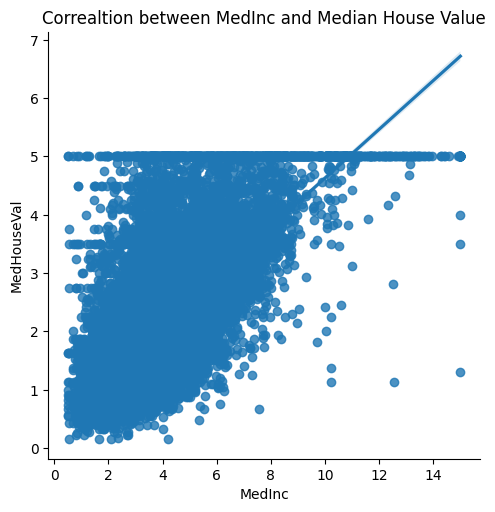

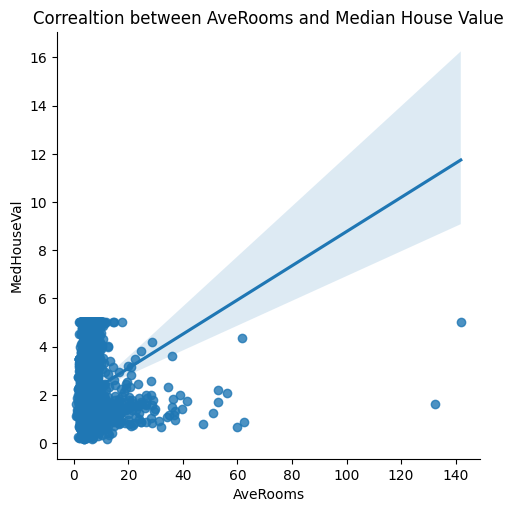

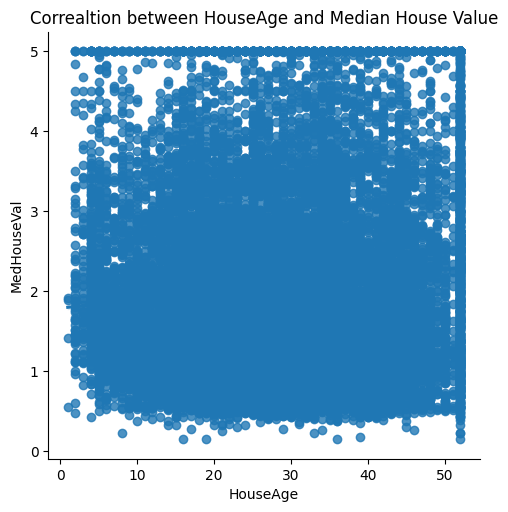

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['MedInc', 'AveRooms', 'HouseAge']

for column in columns:
  sns.lmplot(x=column, y='MedHouseVal', data=df)
  plt.title(f'Correaltion between {column} and Median House Value')
  plt.show()